# Домашнее задание по теме "Теория вероятности. Дискретные случайные величины"

## Уровень 0:
### Задание 1:
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.

### Задание 2:
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

## Уровень 1:
### Задание 3:
Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

### Задание 4 (формула полной вероятности):
В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

## Решение

### Задание 1:
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов.(2,3,5,7,11,13)

In [5]:
from scipy.stats import *
import numpy as np

### Альтернативный способ ???

In [22]:
# количество подбрасываний монетки
n = 15

In [38]:
simple = 0
for i in range(2, n+1):
    division = 0
    for x in range(1, i+1):
        if i % x == 0:
            division += 1
        if division == 2 and x == i:
            simple = simple + 1
print('Количество простых чисел: {} при количестве подбрасываний: n = {} '.format(simple, n))         

Количество простых чисел: 6 при количестве подбрасываний: n = 15 


In [39]:
# вероятность выпадения орла
P_eagle = 0.5

In [44]:
# вероятность выпадения простого числа как число благоприятных исходов simple на(/) все возможные варианты n
P_simple = simple / n
P_simple

0.4

In [53]:
# по формуле условной вероятности
# P_eagle_simple = P_eagle * P (simple / eagle)
P_simple_after_eagle = P_simple
P_eagle_simple = P_eagle * P_simple_after_eagle 

In [54]:
print('Вероятность выпадения простого числа орлов', P_eagle_simple)

Вероятность выпадения простого числа орлов 0.2


### Первый способ

In [55]:
import math

In [68]:
# по формуле Бернулли Pn_k = Сn_k * p**k * (1 - p)**(n - k)
# сочетание Сn_k= n! /(k!(n-k)!)
n = 15
k = simple
p = P_simple
n, k, p

(15, 6, 0.4)

In [69]:
Cn_k = math.factorial(n) / (math.factorial(k) * math.factorial(n-k))
Cn_k

5005.0

In [70]:
koef = p ** k * (1 - p) ** (n - k)
koef

4.127824281600001e-05

In [72]:
Pn_k = Cn_k * koef
print('Вероятность выпадения простого числа орлов', Pn_k)

Вероятность выпадения простого числа орлов 0.20659760529408003


### Задание 2:
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [87]:
import matplotlib.pyplot as plt
from scipy.stats import * 

In [157]:
# случайная величина формируемая по 1000 раз
random_value = np.random.randint(1, 13, (1000, 10), dtype = np.int16)
random_value

array([[ 8,  7,  7, ...,  4,  7, 11],
       [12,  3,  2, ..., 10,  5,  1],
       [11,  4,  4, ..., 11, 10,  6],
       ...,
       [12,  4,  3, ..., 12,  7,  3],
       [ 1,  5,  3, ...,  2,  8,  6],
       [ 7,  8,  6, ...,  2,  5, 10]], dtype=int16)

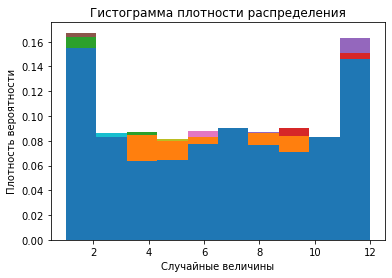

In [170]:
plt.hist(random_value, density=True, histtype  = 'stepfilled');
plt.xlabel('Случайные величины')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма плотности распределения');

In [171]:
# среднее
print('Среднее значение выборки', np.mean(random_value))

Среднее значение выборки 6.5014


In [172]:
# дисперсия
print('Дисперсия выборки', np.var(random_value))

Дисперсия выборки 11.92299804


In [173]:
# медиана
print('Медиана выборки', np.median(random_value))

Медиана выборки 7.0


### Задание 3:
Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [180]:
# условие попарной независимости P_A1_A2 = P_A1 * P_A2 (где цифры справа номера монет участвующих в эксперименте, а слева номера экспер)
# вероятности благоприятных исходов событий (2 варианта выпадения монет, лежащих на одной стороне из всего возможных 4 вариантов)
P_A1 = 2 / 4
P_A2 = 2 / 4
P_A3 = 2 / 4

In [190]:
# вероятности благоприятных исходов 2-х событий (A1 и A2 и т.д.) 
P_A1_A2 = 2 / 8
P_A2_A3 = 2 / 8
P_A3_A1 = 2 / 8

In [198]:
# проверка на попарную независимость событий
if P_A1_A2 == P_A1 * P_A2:
    print('A1 и A2 - попарнонезависимы')
if P_A2_A3 == P_A2 * P_A3:
    print('A2 и A3 - попарнонезависимы')
if P_A3_A1 == P_A1 * P_A3:
    print('A1 и A3 - попарнонезависимы')

A1 и A2 - попарнонезависимы
A2 и A3 - попарнонезависимы
A1 и A3 - попарнонезависимы


In [194]:
# вероятность благоприятных исходов 3-х событий (A1, A2 и A3) 
P_A1_A2_A3 = 2 / 8

In [197]:
# условие совокупной независимости P_A1_A2_A3 = P_A1 * P_A2 * P_A3
# проверка на совокупную независимость событий
if P_A3_A1 == P_A1 * P_A2 * P_A3:
    print('A1, A2 и A3 - попарнонезависимы')
else:
    print('Unindependent')

Unindependent


### Задание 4 (формула полной вероятности):
В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [206]:
# вероятности высшего сорта на предприятиях
PB_A = np.array([0.1, 0.05, 0.2])

In [207]:
# вероятности распределения продукции между предприятиями
PA = np.array([0.2, 0.3, 0.5])

In [211]:
# вероятность события B - случайно купленная продукция окажется высшего сорта
P_B = np.sum(PA * PB_A)
print('Вероятность события B -  случайно купленная новая продукция окажется высшего сорт : {}'.format(P_B))

Вероятность события B -  случайно купленная новая продукция окажется высшего сорт : 0.135
